In [2]:
import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd
import os
from selenium import webdriver
import seaborn as sns

In [3]:
chromedriver = '/Applications/chromedriver'
os.environ["webdriver.chrome.driver"] = \
    chromedriver

driver = webdriver.Chrome(chromedriver)

Scrapping World Bankdata

In [4]:
worldBank_indicators = [{"indicator_id": "NY.GDP.MKTP.CD", "indicator_name": "gdp"},
                        {"indicator_id": "EN.ATM.CO2E.KT", "indicator_name": "c02"},
                        {"indicator_id": "SH.MED.BEDS.ZS", "indicator_name": "hospital_beds"},
                        {"indicator_id": "NY.GNP.PCAP.CD", "indicator_name": "gni"},
                        {"indicator_id": "HD.HCI.OVRL", "indicator_name": "hdi"},
                        {"indicator_id": "SP.DYN.LE00.IN", "indicator_name": "life_expectancy"},
                        {"indicator_id": "SH.DTH.COMM.ZS", "indicator_name": "death_malnutrition"},
                        {"indicator_id": "SE.XPD.TOTL.GD.ZS", "indicator_name": "education_dgp"}]

#GNI Stands for Gross national income per capita
#C02 Emmissions (Metrics tons per capita)
#Hospital Beds (per 1,000 people)
#HDI stands for Human Development Index
#GDP Gross domestic product

In [5]:
countries_dict = {}

In [6]:
def checkKey(dict, key):
    if key in dict.keys():
        return True
    else:
        return False

def getWorldBankData(soup):
    extracted_data = []
    tableRows = soup.find_all(class_="item")
    tableRows.pop(0) 
    for div in tableRows:
        country = div.contents[0].find('a').string
        value = div.contents[2].string
        if value:
            value = value.replace(',', '')
        extracted_data.append({'country': country, 'dataValue': value})
    return extracted_data

def insertWorldBankIndicator(data, indicator):
    for item in data:
        country = item['country']
        indicatorValue = item['dataValue']
        if checkKey(countries_dict, country) == False:
            countries_dict[country] = {}
            
        countries_dict[country][indicator] = indicatorValue
        
for indicator in worldBank_indicators:
    url = 'https://data.worldbank.org/indicator/'+indicator["indicator_id"]
    driver.get(url)
    soup = bs(driver.page_source)
    insertWorldBankIndicator(getWorldBankData(soup), indicator["indicator_name"])
    

In [7]:
df = pd.DataFrame.from_dict(countries_dict, orient='index')
# df = df[df['life_expectancy'].notna()]
# df = df.dropna()
# df = df[:"Zimbabwe"]

In [8]:
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, Afghanistan to Upper middle income
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gdp                 244 non-null    float64
 1   c02                 233 non-null    float64
 2   hospital_beds       231 non-null    float64
 3   gni                 236 non-null    float64
 4   hdi                 173 non-null    float64
 5   life_expectancy     239 non-null    float64
 6   death_malnutrition  214 non-null    float64
 7   education_dgp       226 non-null    float64
dtypes: float64(8)
memory usage: 17.4+ KB


In [9]:
df.head(100)

,gdp,c02,hospital_beds,gni,hdi,life_expectancy,death_malnutrition,education_dgp
Afghanistan,19807.07,7440.0,0.4,500.0,0.4,65.0,33.0,4.1
Albania,14799.62,5560.0,2.9,5210.0,0.6,79.0,3.0,3.6
Algeria,145163.90,151670.0,1.9,3550.0,0.5,77.0,13.0,4.3
American Samoa,638.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,3155.07,460.0,2.5,NaN,NaN,NaN,NaN,3.2
...,...,...,...,...,...,...,...,...
Israel,401953.80,61970.0,3.0,43070.0,0.7,83.0,10.0,6.1
Italy,1886445.27,324850.0,3.1,32200.0,0.7,83.0,6.0,4.0
Jamaica,13812.42,8510.0,1.7,4620.0,0.5,74.0,9.0,5.2
Japan,5064872.88,1106150.0,13.0,41580.0,0.8,84.0,10.0,3.2


Getting Inmunization Data

In [122]:
bcg_df = pd.read_csv('bcg.csv')
bcg_dict = bcg_df[["country", "2019"]].to_dict('records')

dtp3_df = pd.read_csv('dtp3.csv')
dtp3_dict = dtp3_df[["country", "2019"]].to_dict('records')

hepb_df = pd.read_csv('hepb.csv')
hepb_dict = hepb_df[["country", "2019"]].to_dict('records')

def insertInmunizationIndicator(inmunization_dict, indicator):
    for item in inmunization_dict:
        country = item["country"]
        indicatorValue = item["2019"]
        if checkKey(countries_dict, country) == True:
            countries_dict[country][indicator] = indicatorValue
        else:
            print(country)

insertInmunizationIndicator(bcg_dict, "bcg")
insertInmunizationIndicator(dtp3_dict, "dtp3")
insertInmunizationIndicator(hepb_dict, "hepb")

Congo
Cook Islands
Czechia
Democratic People's Republic of Korea
Democratic Republic of the Congo
Egypt
Gambia
Iran (Islamic Republic of)
Kyrgyzstan
Lao People's Democratic Republic
Micronesia (Federated States of)
Niue
Republic of Korea
Republic of Moldova
Republic of North Macedonia
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Slovakia
State of Palestine
United Republic of Tanzania
Yemen
Bahamas
Congo
Cook Islands
Czechia
Democratic People's Republic of Korea
Democratic Republic of the Congo
Egypt
Gambia
Iran (Islamic Republic of)
Kyrgyzstan
Lao People's Democratic Republic
Micronesia (Federated States of)
Niue
Republic of Korea
Republic of Moldova
Republic of North Macedonia
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Slovakia
State of Palestine
United Republic of Tanzania
Yemen
Bahamas
Congo
Cook Islands
Czechia
Democratic People's Republic of Korea
Democratic Republic of the Congo
Egypt
Gambia
Iran (Islamic Republic of)
Kyrgyzstan
Lao P

In [136]:
df = pd.DataFrame.from_dict(countries_dict, orient='index')
df = df.apply(pd.to_numeric)
df = df[:"Zimbabwe"]

In [155]:
# df['hdi'].plot.hist()

In [154]:
df["bcg"].fillna(df["bcg"].median(), inplace=True)
df["dtp3"].fillna(df["dtp3"].median(), inplace=True)
df["hepb"].fillna(df["hepb"].median(), inplace=True)
df["death_malnutrition"].fillna(df["death_malnutrition"].median(), inplace=True)
df["education_dgp"].fillna(df["education_dgp"].median(), inplace=True)
df["hdi"].fillna(df["hdi"].mean(), inplace=True)
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gdp                 190 non-null    float64
 1   c02                 190 non-null    float64
 2   hospital_beds       190 non-null    float64
 3   gni                 190 non-null    float64
 4   hdi                 190 non-null    float64
 5   life_expectancy     190 non-null    float64
 6   death_malnutrition  190 non-null    float64
 7   education_dgp       190 non-null    float64
 8   bcg                 190 non-null    float64
 9   dtp3                190 non-null    float64
 10  hepb                190 non-null    float64
dtypes: float64(11)
memory usage: 17.8+ KB


<AxesSubplot:>

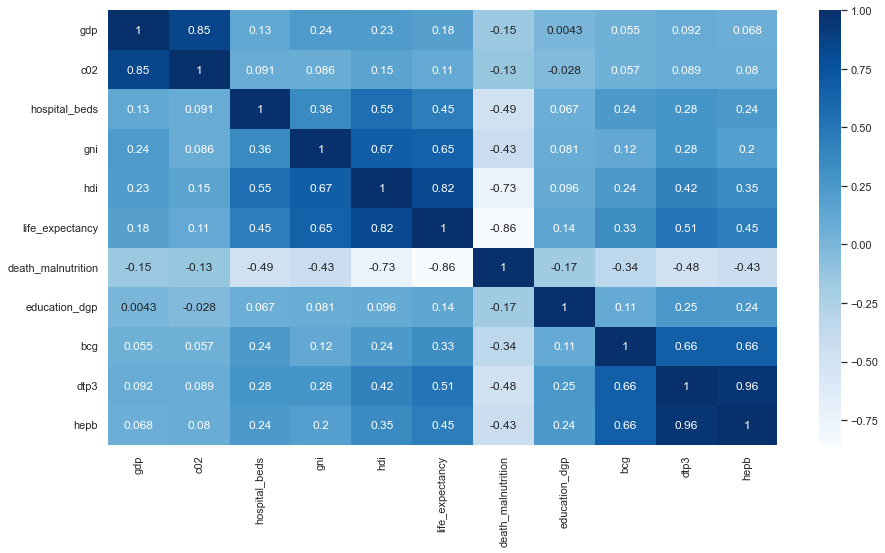

In [143]:
import seaborn as sns
%matplotlib inline
corr = df.corr()

# plot the heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="Blues", annot=True)


In [144]:
import statsmodels.api as sm
Y = df["life_expectancy"]
x = df.drop(columns = ['life_expectancy'])
x = sm.add_constant(x)
model = sm.OLS(Y,x, data=df)
model.fit().summary()

/Users/xavierpaez/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           2.95e-71
Time:                        12:50:36   Log-Likelihood:                -462.36
No. Observations:                 190   AIC:                             946.7
Df Residuals:                     179   BIC:                             982.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 63.5265      2.703     23.499      0.000      58.192      68.861
gdp                 3.181e-08   2.18e-07      0.146      0.884   -3.99e-07    4.63e-07
c02                -2.426e-07   4.81e-07     -0.504      0.615   -1.19e-06    7.07e-07
hospital_beds         -0.2473      0.106     -2.342      0.020      -0.456      -0.039
gni                 8.642e-05   1.43e-05      6.040      0.000    5.82e-05       0.000
hdi                   14.7757      2.894      5.106      0.000       9.065      20.486
death_malnutrition    -0.2272      0.018    -12.910      0.000      -0.262      -0.192
education_dgp         -0.0824      0.110     -0.747      0.456      -0.300       0.135
bcg                    0.0082      0.026      0.315      0.753      -0.043       0.060
dtp3                   0.0194      0.066      0.292      0.771      -0.112       0.150
hepb                   0.0305      0.062      0.489      0.625      -0.093       0.154
==============================================================================
Omnibus:                        1.650   Durbin-Watson:                   2.289
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.269
Skew:                          -0.155   Prob(JB):                        0.530
Kurtosis:                       3.252   Cond. No.                     3.64e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
model = sm.OLS(Y,x)
fit = model.fit()
vif = pd.DataFrame()
vif['variables'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,vif
0,const,171.967701
1,gdp,4.160254
2,c02,4.000599
3,hospital_beds,1.496630
4,gni,2.007165
5,hdi,3.558299
6,death_malnutrition,2.452727
7,education_dgp,1.092847
8,bcg,1.858820
9,dtp3,15.691305


In [148]:
import statsmodels.api as sm
Y = df["life_expectancy"]
x = df.drop(columns = ['life_expectancy', 'hdi', 'dtp3', 'hepb', 'bcg'])
x = sm.add_constant(x)
model = sm.OLS(Y,x, data=df)
model.fit().summary()

/Users/xavierpaez/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     151.9
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           2.52e-68
Time:                        12:52:43   Log-Likelihood:                -480.02
No. Observations:                 190   AIC:                             974.0
Df Residuals:                     183   BIC:                             996.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 77.1695      0.833     92.687      0.000      75.527      78.812
gdp                 8.599e-09   2.36e-07      0.036      0.971   -4.58e-07    4.75e-07
c02                -7.738e-08   5.21e-07     -0.149      0.882   -1.11e-06     9.5e-07
hospital_beds         -0.0879      0.110     -0.801      0.424      -0.304       0.129
gni                    0.0001    1.3e-05      9.820      0.000       0.000       0.000
death_malnutrition    -0.2923      0.015    -19.489      0.000      -0.322      -0.263
education_dgp         -0.0520      0.116     -0.447      0.656      -0.282       0.178
==============================================================================
Omnibus:                        3.634   Durbin-Watson:                   2.279
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.237
Skew:                          -0.304   Prob(JB):                        0.198
Kurtosis:                       3.199   Cond. No.                     7.95e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lr = model.fit(x, Y)
r_squared = lr.score(x,Y)
print(r_squared)

0.8328145945304306


In [150]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['life_expectancy', 'hdi', 'dtp3', 'hepb', 'bcg'])
y = df["life_expectancy"]

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [153]:
model = LinearRegression()
lr = model.fit(X,y)
r_squared_train = lr.score(X, y)
r_squared_test = lr.score(X_test, y_test)
print(r_squared_train)
print(r_squared_test)


0.8298671496814963
0.822141358144491


<AxesSubplot:xlabel='actual_value', ylabel='predictions'>

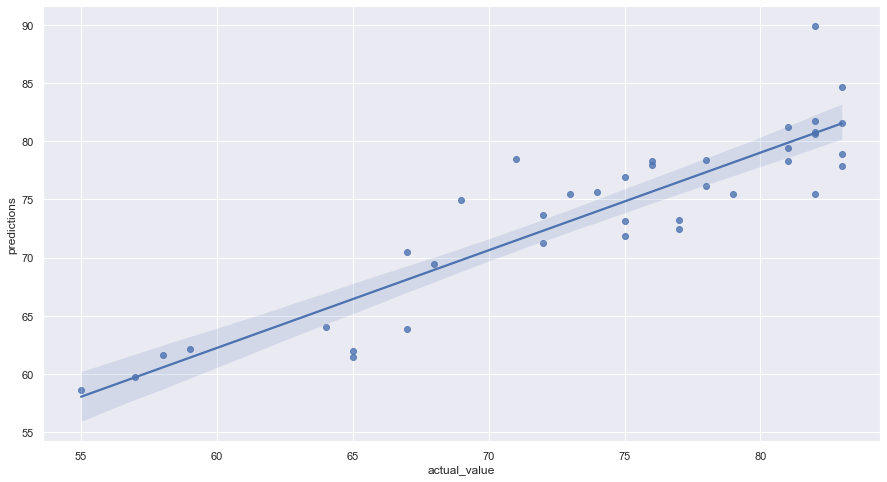

In [152]:
y_pred = pd.DataFrame()
y_pred['predictions'] = lr.predict(X_test)
y_pred['actual_value'] = y_test.values
sns.regplot(x="actual_value", y="predictions", data=y_pred)